# Analytical Dataset Exploration

## Date Created: 1/20/21
## Authors: Geri, Millie

This notebook serves as a place to do data exploration on the `initial_analytic_dataset.csv` which holds all the variables of interest from each of our respective datasets. This is a place to look at the relationships between variables and other assumption checks.

In [91]:
#Packages import
#import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import base64

#Note: You only need to import what you will be using in the notebook. 

In [92]:
file = open("initial_analytic_dataset.csv", "r")
analytic_data = pd.read_csv("initial_analytic_dataset.csv")

In [93]:
analytic_data

,id,pop_total,county,state,pop_class,year,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,...,est_total_households_with_no4,est_total_households_none,est_total_households_with_sub,est_total_households_with_du,est_total_households_with_broadband,est_total_households_with_cellular,est_total_households_with_cell_no,est_total_households_with_cable,est_total_households_with_sat,est_total_households_without_sub
0,0500000US01001,58805.0,Autauga County,Alabama,Metro Area,2018.0,0.789,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01003,231767.0,Baldwin County,Alabama,Metro Area,2018.0,0.781,35912.0,79.0,1447.0,...,27152.0,17291.0,153963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01005,25223.0,Barbour County,Alabama,Micro Area,2018.0,0.604,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01007,22293.0,Bibb County,Alabama,Micro Area,2018.0,0.661,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01009,59134.0,Blount County,Alabama,Metro Area,2018.0,0.685,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72147,8249.0,Vieques Municipio,Puerto Rico,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,0500000US72149,22093.0,Villalba Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,0500000US72151,30426.0,Yabucoa Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,0500000US72153,34172.0,Yauco Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
for col in analytic_data.columns:
    print(col)

id
pop_total
county
state
pop_class
year
broadband_pct
total_pop_enrolled
percent_total_pop_enrolled
margin_total_pop
geo_id_x
est_total_households_x
est_med_income_households
est_total_families
est_med_income_families
geo_id_y
est_total_pop_16_over
est_emp_pop_ratio_16_over
est_unemp_pop_ratio_16_over
geo_id
est_total_households_y
est_total_households_with_device
est_total_households_with_desktop
est_total_households_with_no
est_total_households_with_smartphone
est_total_households_with_no2
est_total_households_with_portable
est_total_households_with_no3
est_total_households_with_other
est_total_households_with_no4
est_total_households_none
est_total_households_with_sub
est_total_households_with_du
est_total_households_with_broadband
est_total_households_with_cellular
est_total_households_with_cell_no
est_total_households_with_cable
est_total_households_with_sat
est_total_households_without_sub


Note from Millie: @JJ - Can you provide documentation onw hat the different "est_total_households_with_no" are? I am assuming that it mean no for a specific device, perhaps the one above, but I would like that confirmed.

In [95]:
analytic_data['est_unemp_pop_ratio_16_over']

0       NaN
1       2.4
2       NaN
3       NaN
4       NaN
       ... 
3217    NaN
3218    NaN
3219    NaN
3220    NaN
3221    NaN
Name: est_unemp_pop_ratio_16_over, Length: 3222, dtype: float64

In [96]:
analytic_data["broadband_pct"] = analytic_data["broadband_pct"] *100
analytic_data["broadband_pct"]

0       78.899997
1       78.099996
2       60.399997
3       66.100001
4       68.500000
          ...    
3217          NaN
3218          NaN
3219          NaN
3220          NaN
3221    79.100001
Name: broadband_pct, Length: 3222, dtype: float64

In [97]:
analytic_data

,id,pop_total,county,state,pop_class,year,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,...,est_total_households_with_no4,est_total_households_none,est_total_households_with_sub,est_total_households_with_du,est_total_households_with_broadband,est_total_households_with_cellular,est_total_households_with_cell_no,est_total_households_with_cable,est_total_households_with_sat,est_total_households_without_sub
0,0500000US01001,58805.0,Autauga County,Alabama,Metro Area,2018.0,78.899997,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01003,231767.0,Baldwin County,Alabama,Metro Area,2018.0,78.099996,35912.0,79.0,1447.0,...,27152.0,17291.0,153963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01005,25223.0,Barbour County,Alabama,Micro Area,2018.0,60.399997,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01007,22293.0,Bibb County,Alabama,Micro Area,2018.0,66.100001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01009,59134.0,Blount County,Alabama,Metro Area,2018.0,68.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72147,8249.0,Vieques Municipio,Puerto Rico,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,0500000US72149,22093.0,Villalba Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,0500000US72151,30426.0,Yabucoa Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,0500000US72153,34172.0,Yauco Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Broadband Percent v. Percent Total Population Enrolled

Text(0.5, 0, 'Broadband Percentage')

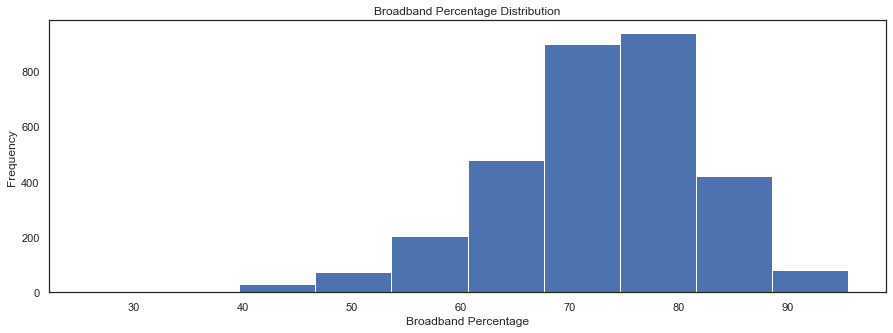

In [98]:
analytic_data["broadband_pct"].plot.hist(figsize=(15, 5))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

Text(0.5, 0, 'Total Pop Enrolled')

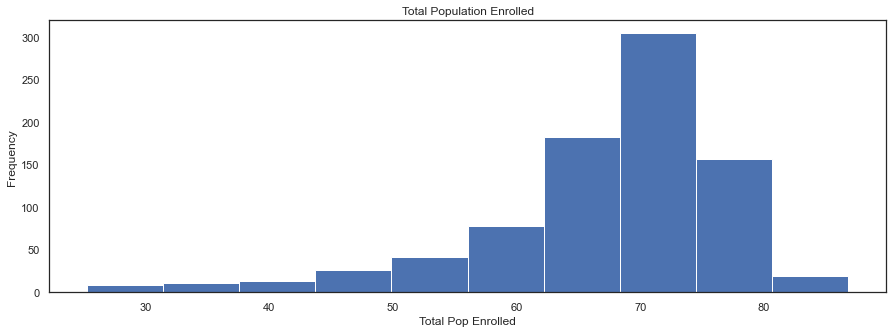

In [99]:
analytic_data["percent_total_pop_enrolled"].plot.hist(figsize=(15, 5))
plt.title("Total Population Enrolled")
plt.xlabel("Total Pop Enrolled")

Text(0, 0.5, 'Total Population Enrolled')

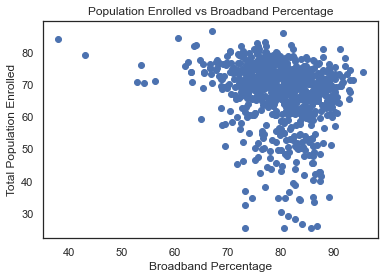

In [100]:
plt.scatter(x = analytic_data["broadband_pct"], y = analytic_data["percent_total_pop_enrolled"]) # The plot
plt.title("Population Enrolled vs Broadband Percentage") # Adding a title
plt.xlabel("Broadband Percentage") # Adding axis labels
plt.ylabel("Total Population Enrolled")

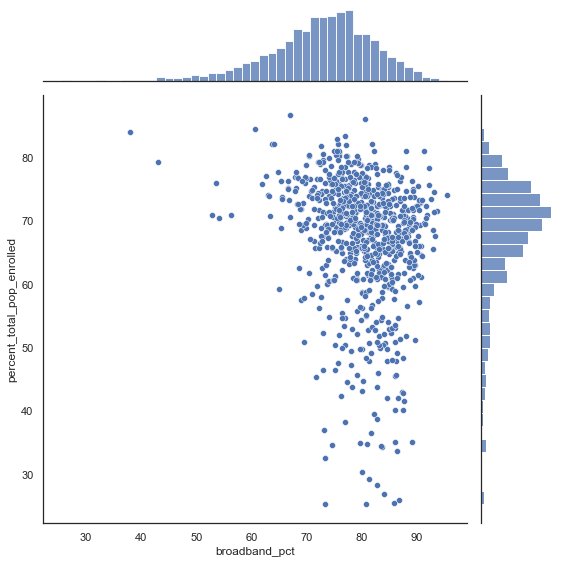

In [101]:
#Note from Millie: I added this plot because I thought it might be more useful than looking at three different plots
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "percent_total_pop_enrolled", height = 8); 

### Distrubution of Devices in Households

For now, looking at all households with some sort of device against total households.

In [102]:
#selecting certian variables
devices_in_hh = analytic_data[['id','est_total_households_y',
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable',
'est_total_households_with_other',
'est_total_households_none']]

In [103]:
#choosing columns to pivot
to_pivot = devices_in_hh[[
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable']]

#reshaping data
plot_devices_df = pd.melt(devices_in_hh, id_vars = 'id', value_vars = to_pivot, var_name = "type", value_name = "value")

#creating a separate value column to place decimal in different place
plot_devices_df['value2'] = plot_devices_df['value']*.001

In [104]:
plot_devices_df.describe()

,value,value2
count,3.284000e+03,3284.000000
mean,2.689772e+04,26.897725
std,5.226474e+04,52.264741
min,2.178000e+03,2.178000
25%,6.914000e+03,6.914000
50%,1.214100e+04,12.141000
75%,2.669300e+04,26.693000
max,1.348569e+06,1348.569000


There is a huge std and data is heavily skewed to the right. 

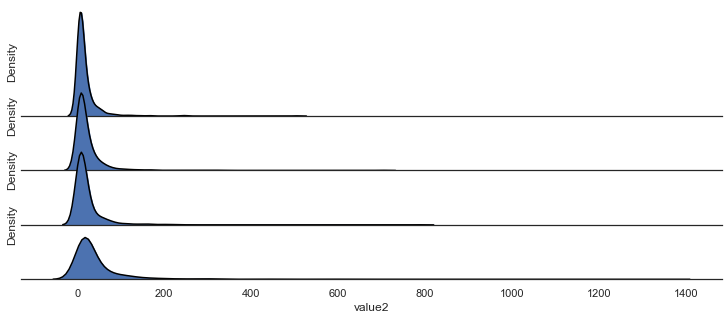

In [105]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_devices_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value2", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value2", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

### Employment Data Distribution

In [106]:
employment_info = analytic_data[['id', 'est_total_pop_16_over', 'est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over']]

plot_employ_df = pd.melt(employment_info, id_vars = 'id', value_vars = ['est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over'], var_name = "type", value_name = "value")

plot_employ_df['value2'] = plot_devices_df['value']*.001

plot_employ_df.describe()


,value,value2
count,1642.000000,1642.000000
mean,31.830390,20.399951
std,27.257013,35.263328
min,1.100000,2.178000
25%,4.600000,5.733000
50%,24.800000,9.967500
75%,59.175000,21.804000
max,76.500000,701.010000


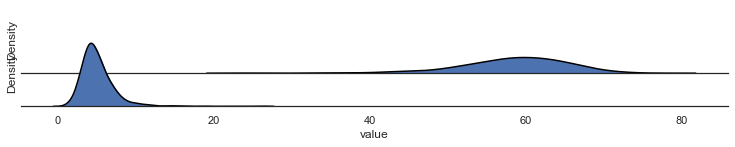

In [107]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_employ_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

Density plot above is incomplete. Currently troubleshooting. 

References for facet density plot:
- https://seaborn.pydata.org/examples/kde_ridgeplot.html
- https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af

### Unemployment and Broadband Percent

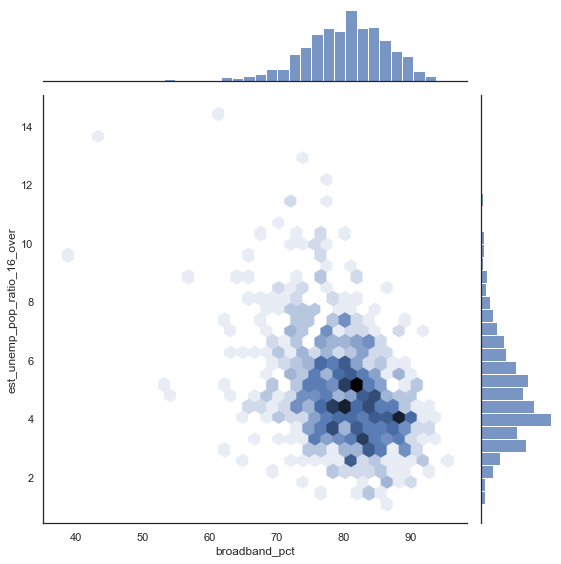

In [108]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "hex", height = 8); 

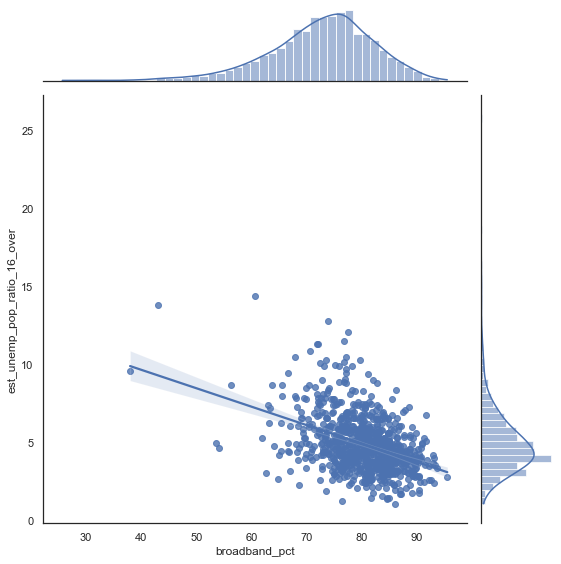

In [109]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "reg", height = 8); 

In [110]:
analytic_data

,id,pop_total,county,state,pop_class,year,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,...,est_total_households_with_no4,est_total_households_none,est_total_households_with_sub,est_total_households_with_du,est_total_households_with_broadband,est_total_households_with_cellular,est_total_households_with_cell_no,est_total_households_with_cable,est_total_households_with_sat,est_total_households_without_sub
0,0500000US01001,58805.0,Autauga County,Alabama,Metro Area,2018.0,78.899997,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01003,231767.0,Baldwin County,Alabama,Metro Area,2018.0,78.099996,35912.0,79.0,1447.0,...,27152.0,17291.0,153963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01005,25223.0,Barbour County,Alabama,Micro Area,2018.0,60.399997,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01007,22293.0,Bibb County,Alabama,Micro Area,2018.0,66.100001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01009,59134.0,Blount County,Alabama,Metro Area,2018.0,68.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72147,8249.0,Vieques Municipio,Puerto Rico,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,0500000US72149,22093.0,Villalba Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,0500000US72151,30426.0,Yabucoa Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,0500000US72153,34172.0,Yauco Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Adding Region Dimension to the Analytic Data

This is to make it easier to breakdown the data visuals so we are not looking at the entire country on one level. All visuals below are exploring with region column. 

In [111]:
regions = pd.read_csv("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")
regions.columns = regions.columns.str.lower().str.replace(" ", "_")
regions

,state,state_code,region,division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [112]:
revised_analytic_data = analytic_data.merge(regions, left_on = "state", right_on = "state", how = "outer")

In [113]:
revised_analytic_data

,id,pop_total,county,state,pop_class,year,broadband_pct,total_pop_enrolled,percent_total_pop_enrolled,margin_total_pop,...,est_total_households_with_du,est_total_households_with_broadband,est_total_households_with_cellular,est_total_households_with_cell_no,est_total_households_with_cable,est_total_households_with_sat,est_total_households_without_sub,state_code,region,division
0,0500000US01001,58805.0,Autauga County,Alabama,Metro Area,2018.0,78.899997,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,South,East South Central
1,0500000US01003,231767.0,Baldwin County,Alabama,Metro Area,2018.0,78.099996,35912.0,79.0,1447.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,South,East South Central
2,0500000US01005,25223.0,Barbour County,Alabama,Micro Area,2018.0,60.399997,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,South,East South Central
3,0500000US01007,22293.0,Bibb County,Alabama,Micro Area,2018.0,66.100001,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,South,East South Central
4,0500000US01009,59134.0,Blount County,Alabama,Metro Area,2018.0,68.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AL,South,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72147,8249.0,Vieques Municipio,Puerto Rico,Rural,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,0500000US72149,22093.0,Villalba Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,0500000US72151,30426.0,Yabucoa Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,0500000US72153,34172.0,Yauco Municipio,Puerto Rico,Micro Area,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


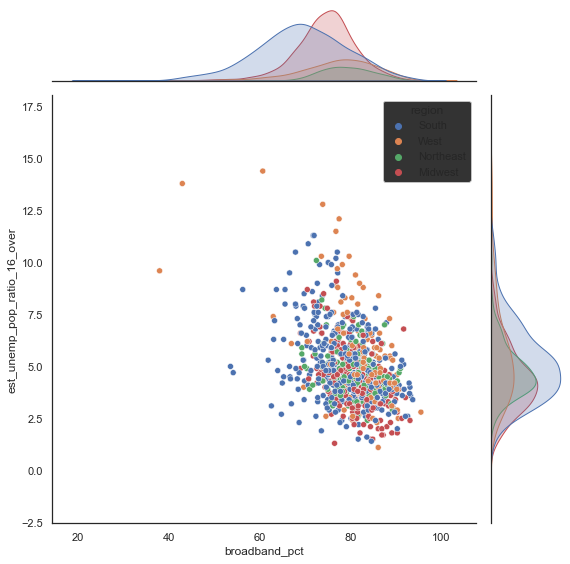

In [114]:
sns.jointplot(data = revised_analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
             hue = "region", height = 8); 

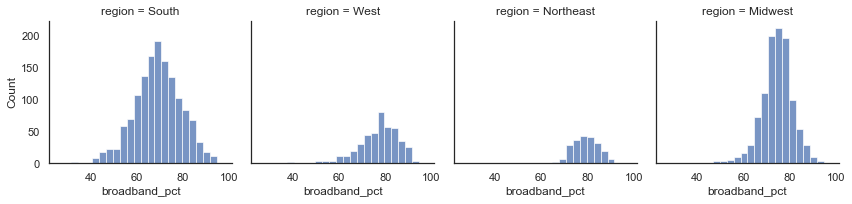

In [115]:
#broadband percent
bb_region = revised_analytic_data[['id', 'region', 'broadband_pct']]
sns.displot(
    bb_region, x="broadband_pct", col="region",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

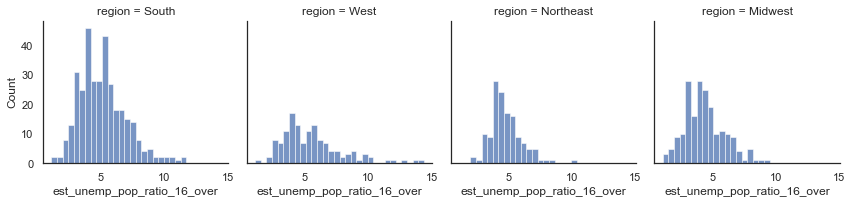

In [116]:
#umemployment ratio
sns.displot(
    revised_analytic_data, x="est_unemp_pop_ratio_16_over", col="region",
    height=3, facet_kws=dict(margin_titles=True),
)

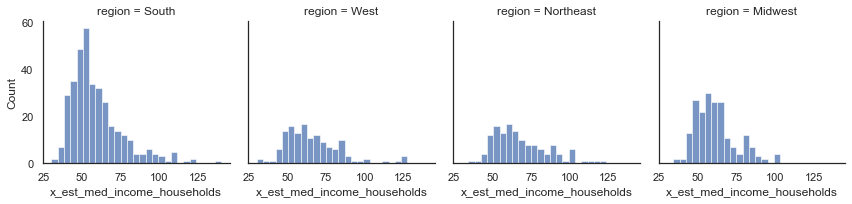

In [117]:
#creating a separate value column to place decimal in different place
revised_analytic_data['x_est_med_income_households'] = revised_analytic_data['est_med_income_households']*.001

#median income
sns.displot(
    revised_analytic_data, x="x_est_med_income_households", col="region",
    height=3, facet_kws=dict(margin_titles=True),
)
